In [104]:
# Import Libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [105]:
#Reading Dataset

cvd=pd.read_excel('CVD_dataset.xlsx')
cvd

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


## Preliminary inspection:
### Checking for null values & duplicate entries

In [106]:
cvd.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [107]:
cvd.var()

age           82.484558
sex            0.217166
cp             1.065132
trestbps     307.586453
chol        2686.426748
fbs            0.126877
restecg        0.276528
thalach      524.646406
exang          0.220707
oldpeak        1.348095
slope          0.379735
ca             1.045724
thal           0.374883
target         0.248836
dtype: float64

In [108]:
cvd.nunique()

age          41
sex           2
cp            4
trestbps     49
chol        152
fbs           2
restecg       3
thalach      91
exang         2
oldpeak      40
slope         3
ca            5
thal          4
target        2
dtype: int64

In [109]:
cvd.isna().any()

age         False
sex         False
cp          False
trestbps    False
chol        False
fbs         False
restecg     False
thalach     False
exang       False
oldpeak     False
slope       False
ca          False
thal        False
target      False
dtype: bool

In [110]:
cvd.duplicated().any()

True

In [111]:
np.where(cvd.duplicated())

(array([164], dtype=int64),)

In [112]:
dup=cvd[cvd.duplicated()]
print(dup)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
164   38    1   2       138   175    0        1      173      0      0.0   

     slope  ca  thal  target  
164      2   4     2       1  


In [113]:
cvd[163:166]

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
163,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
164,38,1,2,138,175,0,1,173,0,0.0,2,4,2,1
165,67,1,0,160,286,0,0,108,1,1.5,1,3,2,0


In [114]:
cvd.drop_duplicates(inplace=True)

In [115]:
cvd.shape

(302, 14)

In [116]:
print(cvd[cvd['age']==0])

Empty DataFrame
Columns: [age, sex, cp, trestbps, chol, fbs, restecg, thalach, exang, oldpeak, slope, ca, thal, target]
Index: []


In [117]:
cvd['target'].value_counts()

1    164
0    138
Name: target, dtype: int64

In [118]:
print('This is a binary classification problem.')

This is a binary classification problem.


### Statistical summary of the Data

In [119]:
cvd.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,302.00000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000,302.000000
mean,54.42053,0.682119,0.963576,131.602649,246.500000,0.149007,0.526490,149.569536,0.327815,1.043046,1.397351,0.718543,2.314570,0.543046
std,9.04797,0.466426,1.032044,17.563394,51.753489,0.356686,0.526027,22.903527,0.470196,1.161452,0.616274,1.006748,0.613026,0.498970
min,29.00000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.00000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.250000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.50000,1.000000,1.000000,130.000000,240.500000,0.000000,1.000000,152.500000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.00000,1.000000,2.000000,140.000000,274.750000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.00000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


## Categorical Columns & their correlation with Target 

In [120]:
cvd.columns

Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')

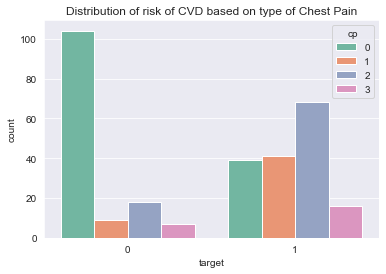

In [121]:
sns.countplot(x='target',hue='cp',data=cvd, palette='Set2')
plt.title('Distribution of risk of CVD based on type of Chest Pain');

Plot shows significant risk of CVD for people having type 2 & type 1 Chest Pain.

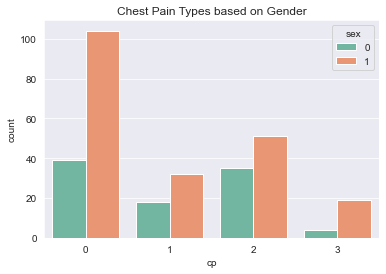

In [122]:
sns.countplot(x='cp',hue='sex',data=cvd, palette='Set2')
plt.title('Chest Pain Types based on Gender');

Chest Pain Type 0 is predominant in both Male & Female.

### Occurence of CVD across Age Category

In [123]:
age_target=cvd.groupby(['target','sex'])[['age']].mean()
age_target

age
target sex           
0      0    59.041667
       1    56.087719
1      0    54.555556
       1    51.043478

In [124]:
age_target.reset_index(level=['target','sex'])
age_target

age
target sex           
0      0    59.041667
       1    56.087719
1      0    54.555556
       1    51.043478

In [125]:
age_target=age_target.reset_index(level=['target','sex'])

In [126]:
age_target1=age_target[age_target['target']==1]
age_target1

,target,sex,age
2,1,0,54.555556
3,1,1,51.043478


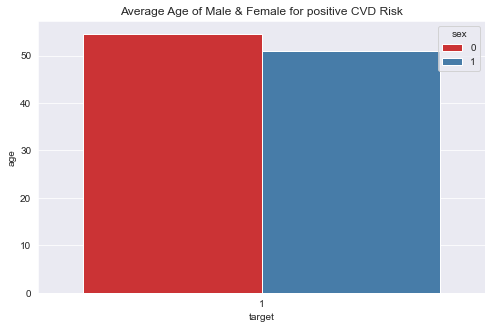

In [127]:
plt.figure(figsize=(8,5))
sns.barplot(x='target',y='age',hue='sex',data=age_target1,palette='Set1')
plt.title('Average Age of Male & Female for positive CVD Risk');

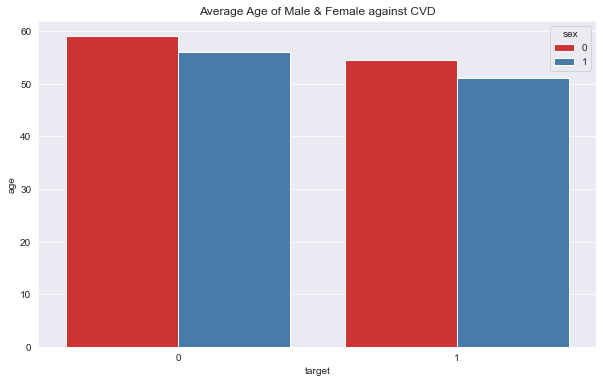

In [128]:
plt.figure(figsize=(10,6))
sns.barplot(x='target',y='age',hue='sex',data=age_target,palette='Set1')
plt.title('Average Age of Male & Female against CVD');

From above plots, we can clearly visualise that average age of both men & women having risk of CVD is lower than the avg. age for no risk of CVD.


### Composition of Patients with respect to Gender

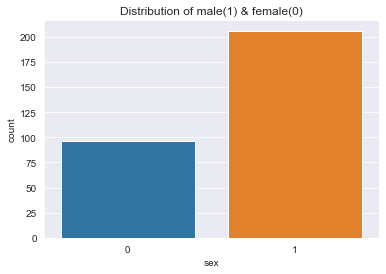

In [129]:
sns.countplot(cvd['sex'])
plt.title('Distribution of male(1) & female(0)');

In [130]:
cvd['sex'].value_counts()

1    206
0     96
Name: sex, dtype: int64

In [131]:
# As evident,  this dataset contains more enteries of Male than female.
# Male-68%, Feamle-32%

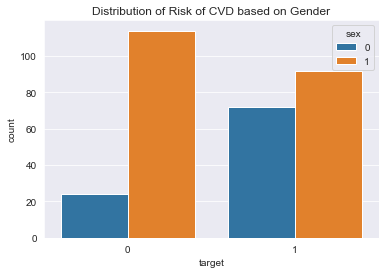

In [132]:
sns.countplot(x='target',hue='sex', data=cvd)
plt.title('Distribution of Risk of CVD based on Gender');

From above plots, we can observe higher no. of male in both no CVD & CVD.
Women have higher proportion of CVD compared to no CVD>

In [133]:
cvd.corr()['target']*100

age         -22.147583
sex         -28.360936
cp           43.207959
trestbps    -14.626866
chol         -8.143720
fbs          -2.682597
restecg      13.487445
thalach      41.995504
exang       -43.560076
oldpeak     -42.914583
slope        34.393953
ca          -40.899198
thal        -34.310071
target      100.000000
Name: target, dtype: float64

### Impact of Blood Pressure on CVD

<AxesSubplot:xlabel='target', ylabel='trestbps'>

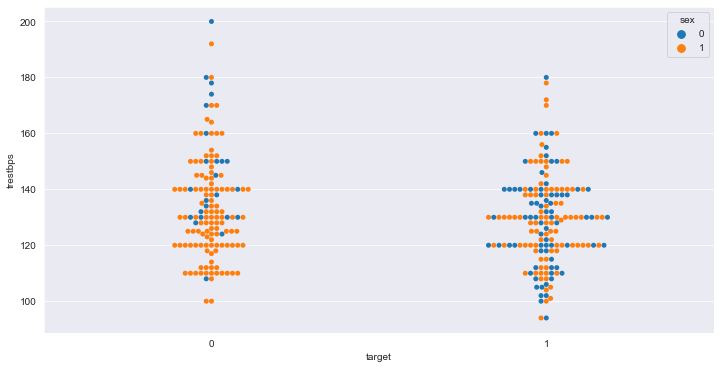

In [134]:
sns.set_style('darkgrid')
plt.figure(figsize=(12,6))
sns.swarmplot(x='target',y='trestbps',hue='sex',data=cvd)

In [135]:
bp_tgt=cvd.groupby(['target','sex'])[['trestbps']].mean()
bp_tgt

trestbps
target sex            
0      0    146.125000
       1    131.929825
1      0    128.736111
       1    129.652174

In [136]:
bp_tgt.reset_index(level=['target','sex'],inplace=True)
bp_tgt

,target,sex,trestbps
0,0,0,146.125000
1,0,1,131.929825
2,1,0,128.736111
3,1,1,129.652174


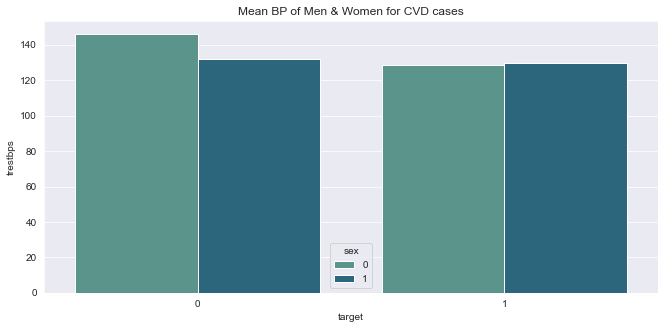

In [137]:
sns.set_style('darkgrid')
plt.figure(figsize=(11,5))
sns.barplot(x='target',y='trestbps',hue='sex',data=bp_tgt,palette='crest')
plt.title('Mean BP of Men & Women for CVD cases');

Mean resting BP for both men & women is lower for Cardiac Patients. So, there exists a negative correlation with the Target.

In [138]:
cvd['trestbps'].describe()

count    302.000000
mean     131.602649
std       17.563394
min       94.000000
25%      120.000000
50%      130.000000
75%      140.000000
max      200.000000
Name: trestbps, dtype: float64

In [139]:
bp_analysis=cvd[['trestbps','target']]
bp_analysis.shape

(302, 2)

In [140]:
q1=bp_analysis['trestbps'].quantile(0.25)
q3=bp_analysis['trestbps'].quantile(0.75)
iqr=q3-q1
min_range=q1-1.5*iqr
max_range=q3+1.5*iqr
print(min_range,max_range)

90.0 170.0


In [141]:
bp_analysis=bp_analysis[bp_analysis['trestbps']<=170]
bp_analysis.shape

(293, 2)

<AxesSubplot:xlabel='target', ylabel='trestbps'>

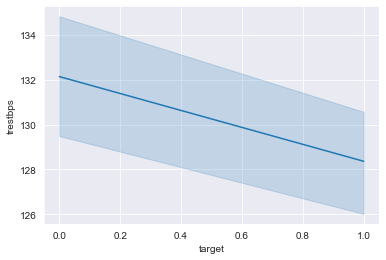

In [142]:
sns.lineplot(x='target',y='trestbps',data=bp_analysis,legend=True)

<AxesSubplot:xlabel='target'>

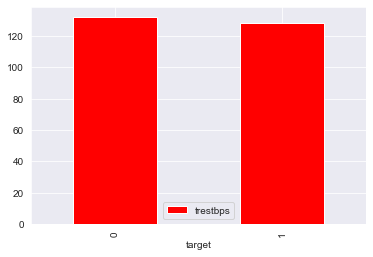

In [143]:
bp_analysis.groupby(['target'])[['trestbps']].mean().plot(kind='bar',color='red')

After removing outlier values, the result is same. There exists a negative correlation between BP & CVD.
Also there is no significant impact of BP on CVD.

### Study of Impact of Blood Sugar Level on CVD

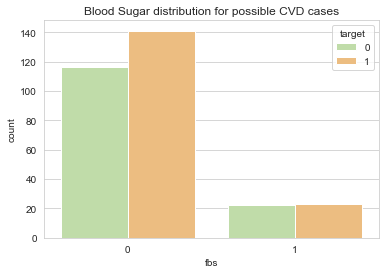

In [144]:
sns.set_style('whitegrid')
sns.countplot(x='fbs',data=cvd,hue='target',palette='Spectral_r')
plt.title('Blood Sugar distribution for possible CVD cases');

This shows that fasting blood sugar has very little impact on CVD.
There exists a weak correlation between them.

### Impact ECG on CVD

In [145]:
ecg_tgt=pd.crosstab(index=cvd['target'],columns=cvd['restecg'])
ecg_tgt

restecg,0,1,2
target,,,
0,79,56,3
1,68,95,1


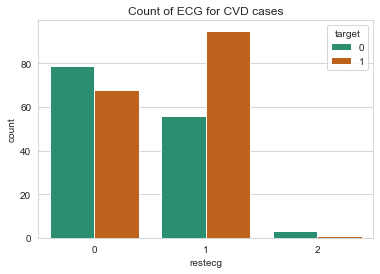

In [146]:
sns.countplot(x='restecg',hue='target',data=cvd,palette='Dark2')
plt.title('Count of ECG for CVD cases');

ECG shows some correlation with Target. When ECG is done, patient has CVD which can be inferred from the above plot.

### Exercise induced Angina & CVD

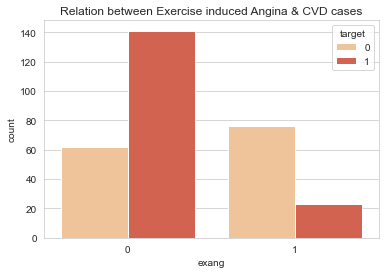

In [147]:
sns.countplot(x='exang',hue='target',data=cvd,palette='OrRd')
plt.title('Relation between Exercise induced Angina & CVD cases');

<AxesSubplot:xlabel='exang', ylabel='target'>

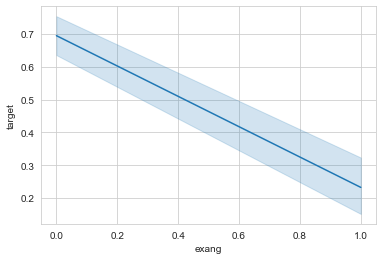

In [148]:
sns.lineplot(x='exang',y='target',data=cvd,palette='OrRd')

The plot shows a negative correlation between execise induced angina and CVD.

### Relationship  between peak exercising and the occurrence of a Heart attack

<AxesSubplot:xlabel='slope', ylabel='target'>

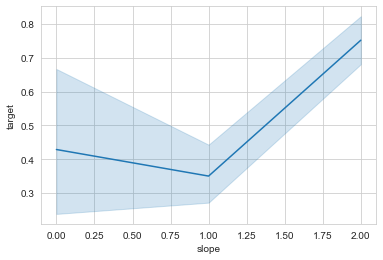

In [149]:
sns.lineplot(x='slope',y='target',data=cvd,palette='OrRd')

Text(0.5, 1.0, 'Relationship  between peak exercising and the occurrence of a heart attack')

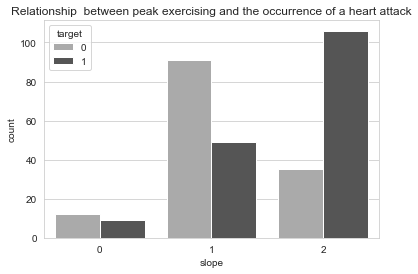

In [150]:
sns.countplot(x='slope',hue='target',data=cvd,palette='binary')
plt.title('Relationship  between peak exercising and the occurrence of a heart attack')

The above plots indicate a clear relationship between Slope & Heart Attack. 
People having Slope of Type 2 have a high risk of heart attack.

### Impact no. of  vessels Colored by Fluoroscopy on CVD

<AxesSubplot:xlabel='ca', ylabel='count'>

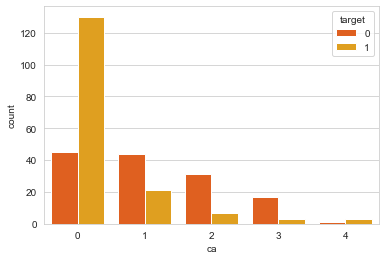

In [151]:
sns.countplot(x='ca',hue='target',data=cvd,palette='autumn')

<AxesSubplot:xlabel='ca', ylabel='target'>

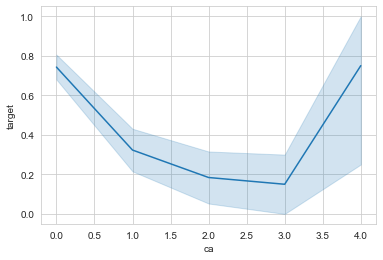

In [152]:
sns.lineplot(x='ca',y='target',data=cvd,palette='inferno')

CA has a negative correlation with Heart Attack.

### Impact of Thalassemia on Risk of CVD

<AxesSubplot:xlabel='thal', ylabel='count'>

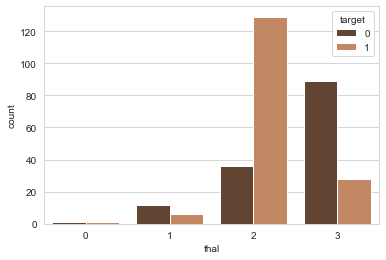

In [153]:
sns.countplot(x='thal',hue='target',data=cvd,palette='copper')

<AxesSubplot:xlabel='thal', ylabel='target'>

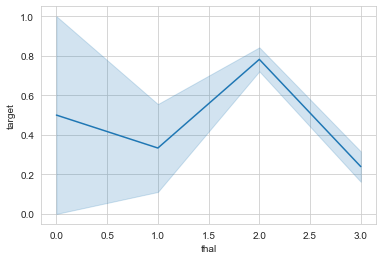

In [154]:
sns.lineplot(x='thal',y='target',data=cvd,palette='copper')

Thalassemia has a negative correlation with Heart attack. So it reduces risk of Heart attack.

### Cholesterol impact on CVD

<AxesSubplot:xlabel='target', ylabel='chol'>

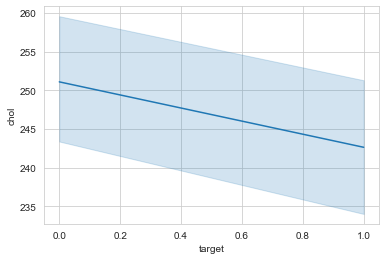

In [155]:
sns.lineplot(x='target',y='chol',data=cvd,palette='Greens')

<AxesSubplot:xlabel='target'>

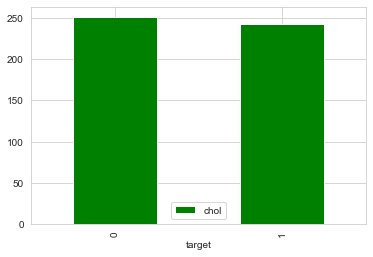

In [156]:
cvd.groupby(['target'])[['chol']].mean().plot(kind='bar',color='green')

<AxesSubplot:xlabel='target', ylabel='chol'>

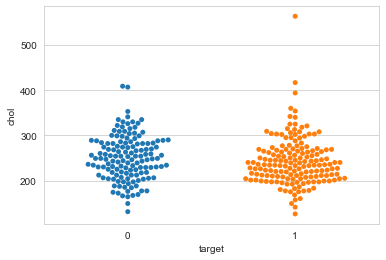

In [157]:
sns.swarmplot(x='target',y='chol',data=cvd)

The data shows slightly negative correlation of Cholestrol with the target.
Also the impact is not very significant.

After removing outlier values, the result is same. There exists a negative correlation between BP & CVD# Visual Re

### Visual representation of correlation of all Variables with Target

<AxesSubplot:>

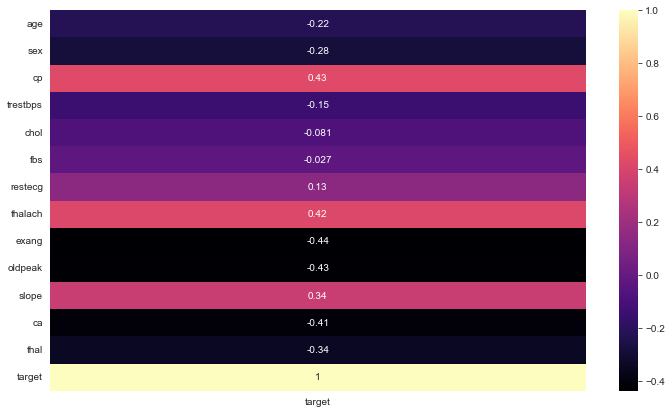

In [158]:
plt.figure(figsize=(12,7))
sns.heatmap(cvd.corr()[['target']],annot=True, cmap='magma')

### Checking the correlation among Features

<AxesSubplot:>

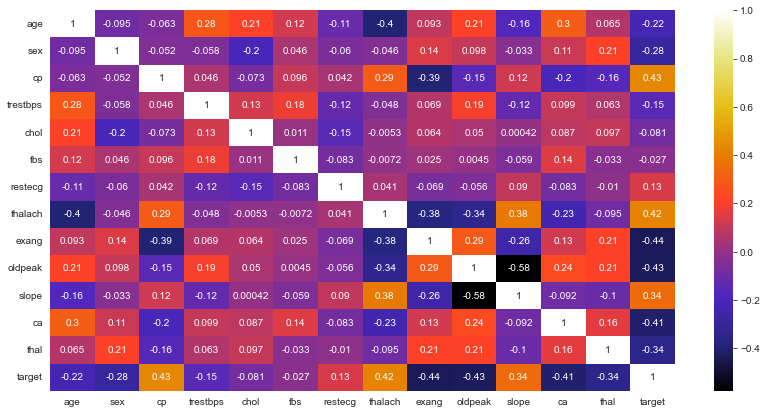

In [159]:
plt.figure(figsize=(14,7))
sns.heatmap(cvd.corr(),annot=True, cmap='CMRmap')

There seems to be no significant correlation among the Features.
Hence, the features are statistically independent.

### Pairplot for representing realtion between the various variables

<Figure size 360x216 with 0 Axes>

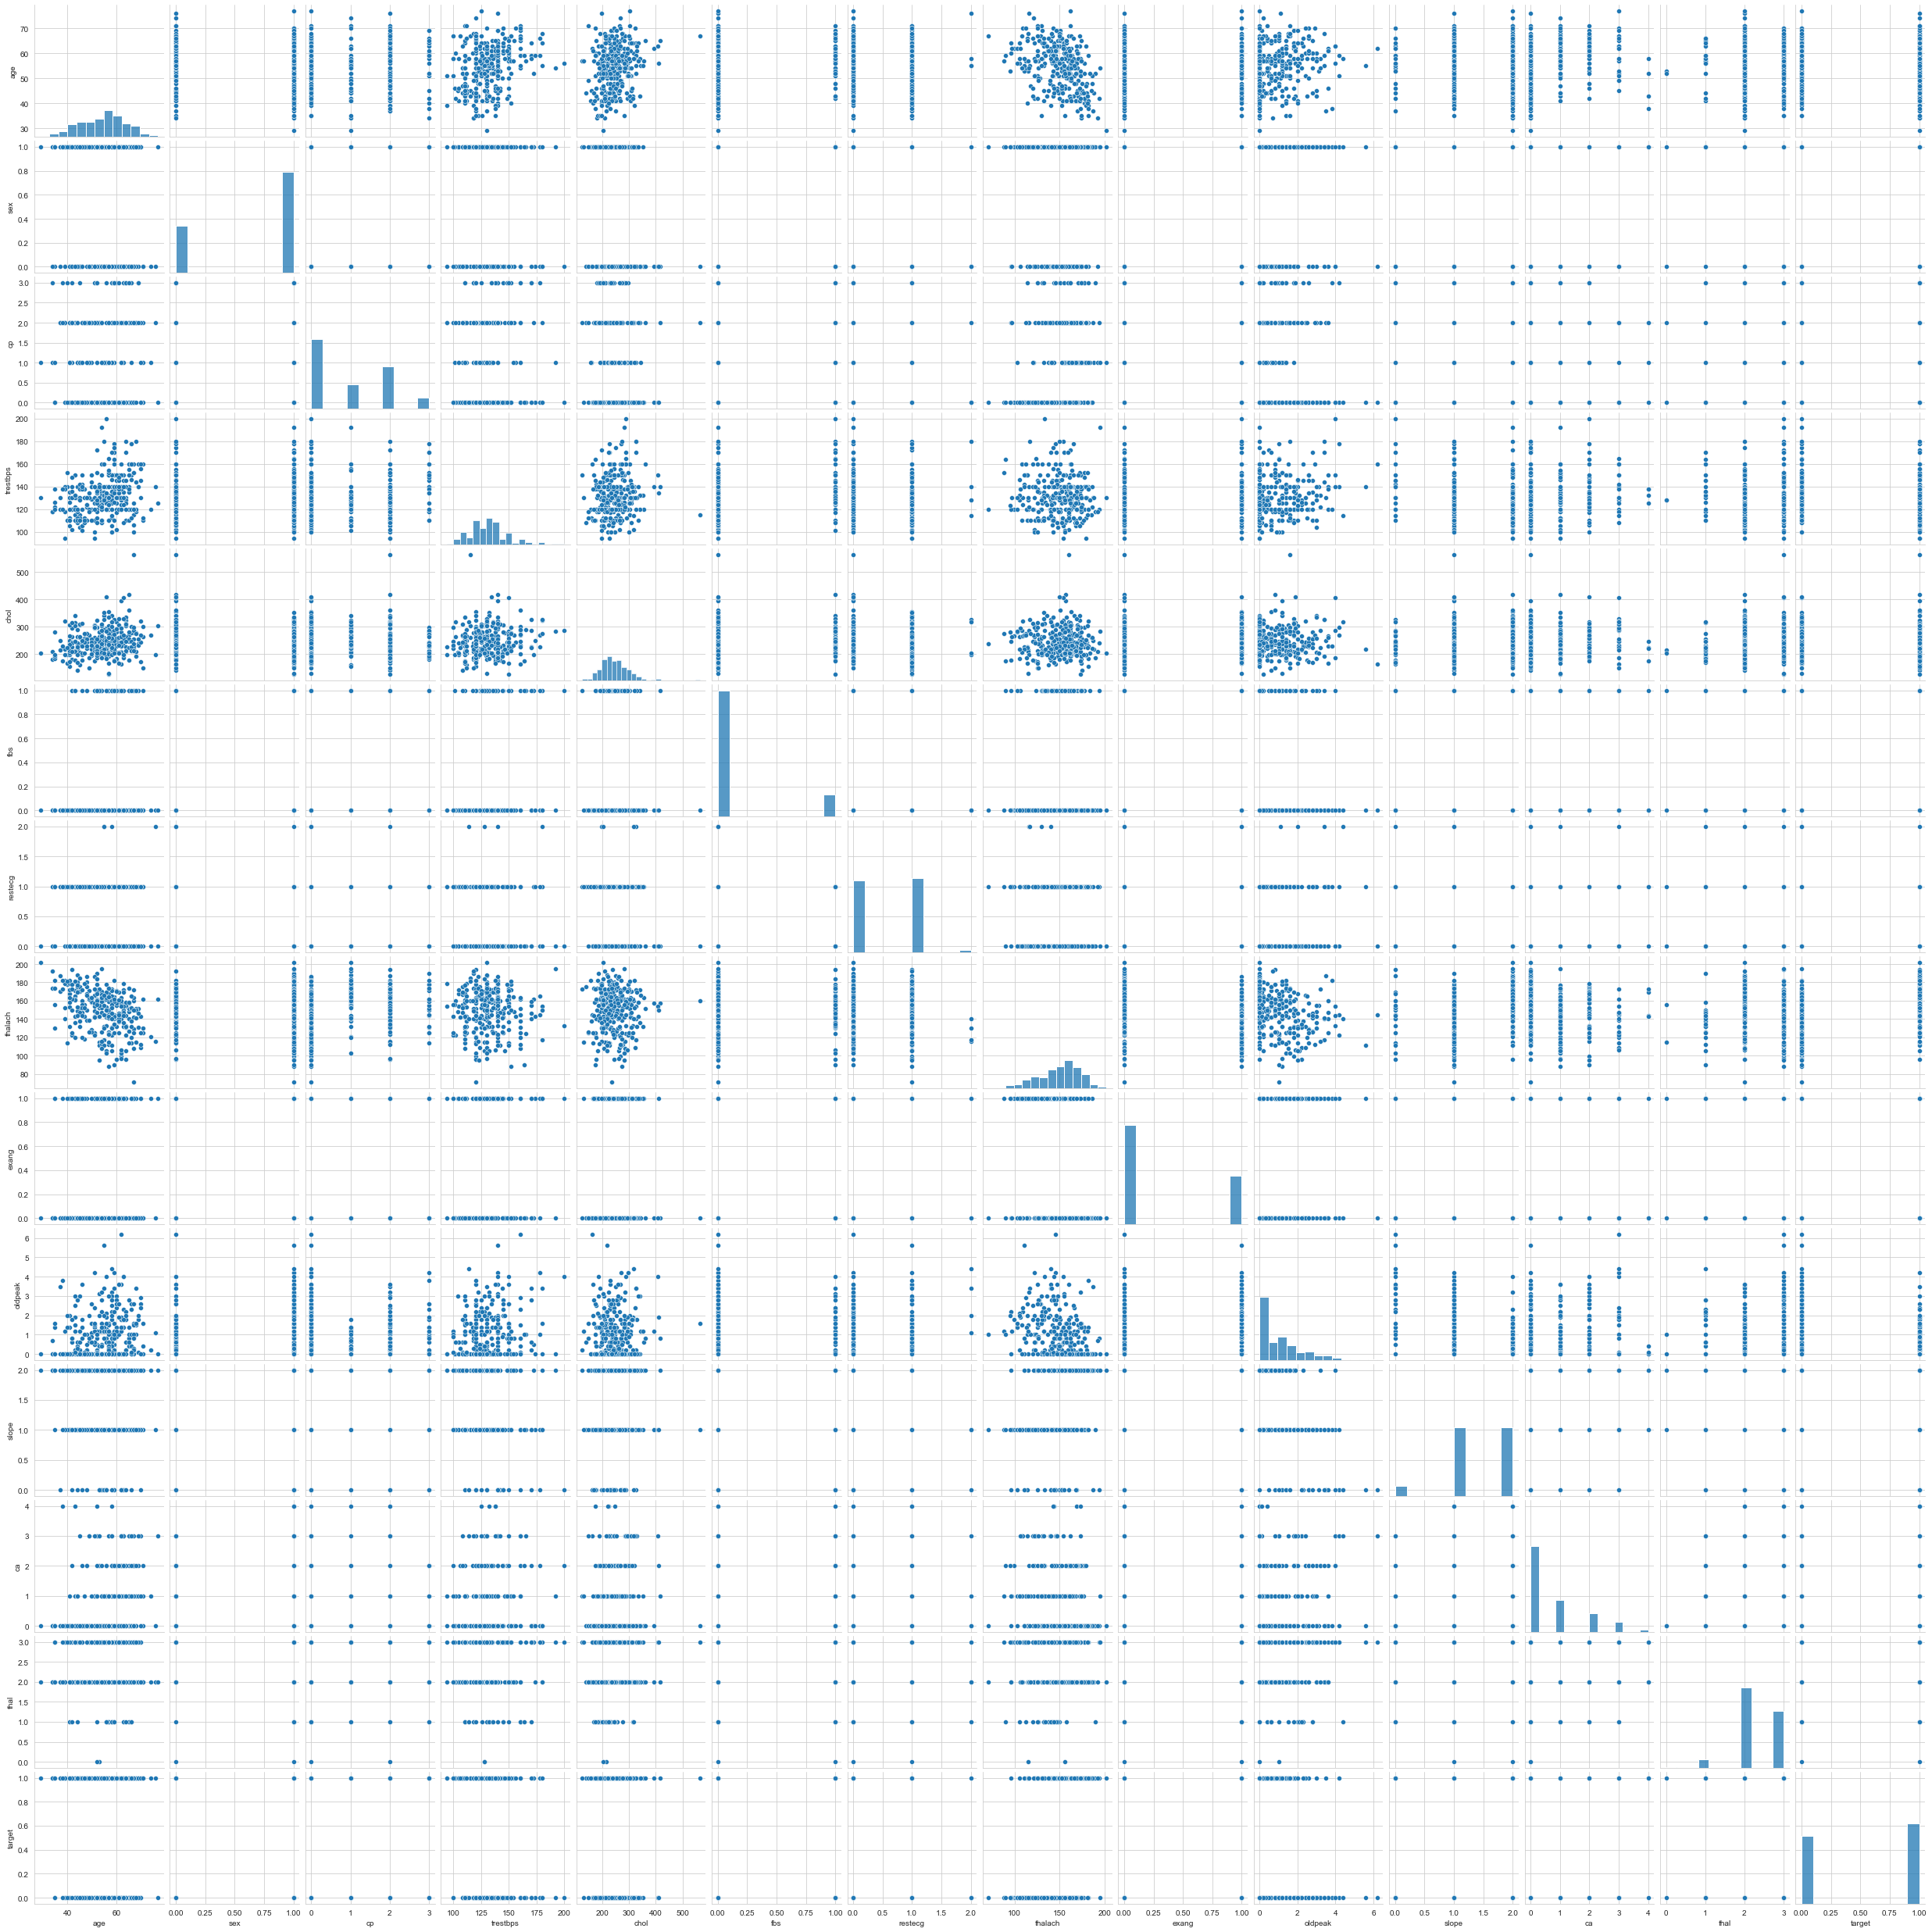

<Figure size 360x216 with 0 Axes>

In [160]:
sns.pairplot(cvd)
plt.figure(figsize=(5,3))

## Check for Significant Features

In [161]:
import statsmodels.api as sm

In [162]:
features=cvd.drop(columns='target')
target=cvd['target']

In [163]:
sm_model=sm.OLS(target,features).fit()
sm_model

In [164]:
sm_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 OLS Regression Results                                
=======================================================================================
Dep. Variable:                 target   R-squared (uncentered):                   0.774
Model:                            OLS   Adj. R-squared (uncentered):              0.764
Method:                 Least Squares   F-statistic:                              76.22
Date:                Sat, 06 Aug 2022   Prob (F-statistic):                    3.05e-85
Time:                        01:47:09   Log-Likelihood:                         -111.63
No. Observations:                 302   AIC:                                      249.3
Df Residuals:                     289   BIC:                                      297.5
Df Model:                          13                                                  
Covariance Type:            nonrobust                                                  
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
age            0.0035      0.002      1.503      0.134      -0.001       0.008
sex           -0.1706      0.047     -3.652      0.000      -0.263      -0.079
cp             0.1091      0.023      4.812      0.000       0.064       0.154
trestbps      -0.0008      0.001     -0.708      0.480      -0.003       0.001
chol          -0.0001      0.000     -0.254      0.799      -0.001       0.001
fbs            0.0084      0.060      0.139      0.890      -0.110       0.127
restecg        0.0686      0.040      1.728      0.085      -0.010       0.147
thalach        0.0050      0.001      5.605      0.000       0.003       0.007
exang         -0.1202      0.051     -2.350      0.019      -0.221      -0.020
oldpeak       -0.0526      0.023     -2.274      0.024      -0.098      -0.007
slope          0.0887      0.043      2.078      0.039       0.005       0.173
ca            -0.1120      0.023     -4.924      0.000      -0.157      -0.067
thal          -0.1021      0.036     -2.866      0.004      -0.172      -0.032
==============================================================================
Omnibus:                        7.900   Durbin-Watson:                   1.048
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                8.133
Skew:                          -0.401   Prob(JB):                       0.0171
Kurtosis:                       2.935   Cond. No.                         962.
==============================================================================

Notes:
[1] R² is computed without centering (uncentered) since the model does not contain a constant.
[2] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

On analysing the p_value of features, we find that features like { age, trestbps, fbs ,restecg & chol} are statistically insignificant.

## Selected Features & Target 

In [165]:
x_features=cvd.drop(columns=['age','trestbps','chol','fbs','restecg'])
y_target=cvd['target']

In [166]:
print(x_features.shape,y_target.shape)

(302, 9) (302,)


## Train_Test_Split

In [167]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x_features,y_target,test_size=0.20,random_state=11)
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(241, 9) (61, 9) (241,) (61,)


## Model 1- Logistic Regression

In [168]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix

In [169]:
LGR=LogisticRegression()
model=LGR.fit(x_train,y_train)

In [170]:
model.score(x_test,y_test)

1.0

In [171]:
y_pred=model.predict(x_test)

In [172]:
confusion_matrix(y_test,y_pred)

array([[24,  0],
       [ 0, 37]], dtype=int64)

<AxesSubplot:>

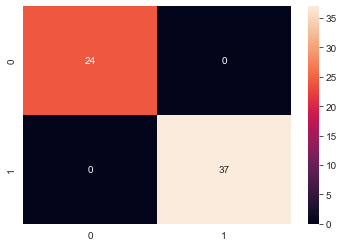

In [173]:
sns.heatmap(confusion_matrix(y_test,y_pred),annot=True,fmt='0.0f')

In [174]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        37

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



## Model 2- Random Forest Classifier

In [175]:
from sklearn.ensemble import RandomForestClassifier
RFC=RandomForestClassifier()

In [176]:
model1=RFC.fit(x_train,y_train)

In [177]:
model1.score(x_test,y_test)

1.0

In [178]:
y_pred1=model1.predict(x_test)

In [179]:
accuracy_score(y_test,y_pred1)

1.0

In [180]:
confusion_matrix(y_test,y_pred1)

array([[24,  0],
       [ 0, 37]], dtype=int64)

<AxesSubplot:>

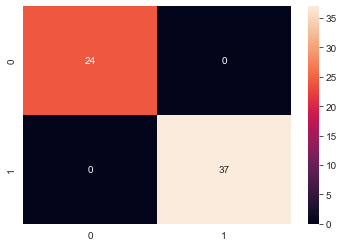

In [181]:
sns.heatmap(confusion_matrix(y_test,y_pred1),annot=True,fmt='0.0f')

In [182]:
print(classification_report(y_test,y_pred1))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        24
           1       1.00      1.00      1.00        37

    accuracy                           1.00        61
   macro avg       1.00      1.00      1.00        61
weighted avg       1.00      1.00      1.00        61



#### Both the models i.e. Logistic Regression & Random Forest Classifier give the exact same result with accuracy & F1-score of 100%.